# Importing

In [31]:
import pandas as pd
import numpy as np

import seaborn as sns
from matplotlib import pyplot as plt


from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier

# Data Reading

In [3]:
data=pd.read_csv("heart-1 (1).csv")

In [4]:
data.shape

(303, 14)

In [5]:
data.head()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
0,63,1,3,145,233,1,0,150,0,2.3,0,0,1,1
1,37,1,2,130,250,0,1,187,0,3.5,0,0,2,1
2,41,0,1,130,204,0,0,172,0,1.4,2,0,2,1
3,56,1,1,120,236,0,1,178,0,0.8,2,0,2,1
4,57,0,0,120,354,0,1,163,1,0.6,2,0,2,1


# Data Dictionay

### Complete attribute documentation:

    3 age: age in years
    4 sex: sex (1 = male; 0 = female)
    9 cp: chest pain type
    -- Value 1: typical angina
    -- Value 2: atypical angina
    -- Value 3: non-anginal pain
    -- Value 4: asymptomatic
    10 trestbps: resting blood pressure (in mm Hg on admission to the hospital)
    12 chol: serum cholestoral in mg/dl
    16 fbs: (fasting blood sugar > 120 mg/dl) (1 = true; 0 = false)
    19 restecg: resting electrocardiographic results
    -- Value 0: normal
    -- Value 1: having ST-T wave abnormality (T wave inversions and/or ST elevation or depression of > 0.05 mV)
    -- Value 2: showing probable or definite left ventricular hypertrophy by Estes' criteria
    32 thalach: maximum heart rate achieved
    38 exang: exercise induced angina (1 = yes; 0 = no)
    40 oldpeak = ST depression induced by exercise relative to rest
    41 slope: the slope of the peak exercise ST segment
    -- Value 1: upsloping
    -- Value 2: flat
    -- Value 3: downsloping
    44 ca: number of major vessels (0-3) colored by flourosopy
    51 thal: 3 = normal; 6 = fixed defect; 7 = reversable defect
    58 num: diagnosis of heart disease (angiographic disease status)
    -- Value 0: < 50% diameter narrowing
    -- Value 1: > 50% diameter narrowing
    (in any major vessel: attributes 59 through 68 are vessels)

In [6]:
data['target'].value_counts(normalize=True)

1    0.544554
0    0.455446
Name: target, dtype: float64

In [7]:
data['target'].value_counts()

1    165
0    138
Name: target, dtype: int64

# Data Visualisation & EDA

In [9]:
data.dtypes

age           int64
sex           int64
cp            int64
trestbps      int64
chol          int64
fbs           int64
restecg       int64
thalach       int64
exang         int64
oldpeak     float64
slope         int64
ca            int64
thal          int64
target        int64
dtype: object

In [16]:
cat_feat = ['sex', 'cp', 'fbs', 'restecg', 'exang', 'slope', 'ca', 'thal']

Feature:  sex


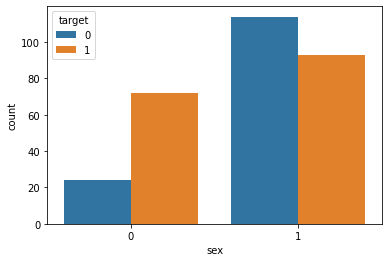

++++++++++++++++++++++++++++++++++++++++++++++++++
Feature:  cp


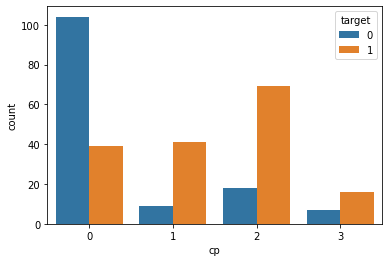

++++++++++++++++++++++++++++++++++++++++++++++++++
Feature:  fbs


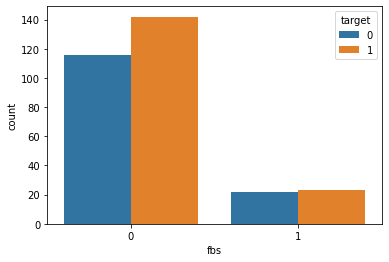

++++++++++++++++++++++++++++++++++++++++++++++++++
Feature:  restecg


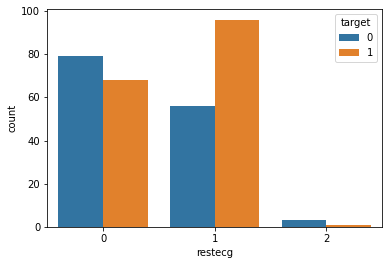

++++++++++++++++++++++++++++++++++++++++++++++++++
Feature:  exang


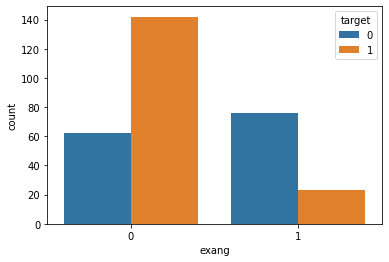

++++++++++++++++++++++++++++++++++++++++++++++++++
Feature:  slope


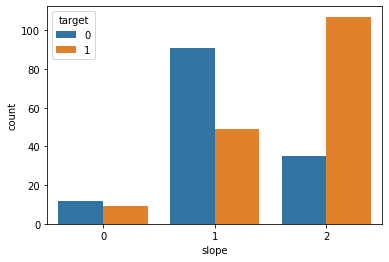

++++++++++++++++++++++++++++++++++++++++++++++++++
Feature:  ca


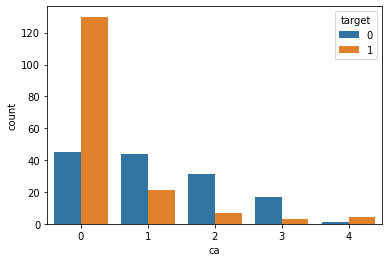

++++++++++++++++++++++++++++++++++++++++++++++++++
Feature:  thal


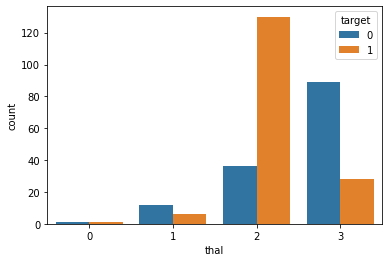

++++++++++++++++++++++++++++++++++++++++++++++++++


In [18]:
for i in cat_feat:
    print("Feature: ", i)
    sns.countplot(x=i,data=data, hue='target')
    plt.show()
    print("+"*50)
    

# Base Model

In [23]:
X=data.drop(columns='target')
y=data['target']

In [26]:
X.shape, y.shape

((303, 13), (303,))

In [29]:
# Train/Test Split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

In [30]:
X_train.shape, X_test.shape

((212, 13), (91, 13))

In [33]:
# DT
dt=DecisionTreeClassifier()
#training or fitting the model
dt.fit(X_train,y_train)

DecisionTreeClassifier()

In [34]:
#predictions
y_pred=dt.predict(X_test)

In [35]:
y_pred

array([0, 1, 1, 0, 1, 1, 1, 0, 0, 0, 1, 0, 1, 0, 1, 1, 1, 0, 0, 0, 1, 0,
       1, 1, 0, 0, 1, 1, 0, 1, 0, 0, 0, 0, 1, 0, 0, 1, 0, 1, 1, 1, 1, 0,
       0, 0, 1, 1, 0, 0, 0, 0, 1, 1, 0, 0, 1, 1, 0, 0, 0, 1, 0, 0, 1, 0,
       0, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 0, 0, 0, 1, 0, 1, 0, 0, 0, 0, 1,
       1, 0, 1], dtype=int64)

In [36]:
from sklearn.metrics import classification_report

In [38]:
print(classification_report(y_test,y_pred))

              precision    recall  f1-score   support

           0       0.70      0.80      0.75        41
           1       0.82      0.72      0.77        50

    accuracy                           0.76        91
   macro avg       0.76      0.76      0.76        91
weighted avg       0.77      0.76      0.76        91



In [41]:
max_depth=list(range(1,16))

In [42]:
max_depth
parameter='max_depth'

In [43]:
# DT
dt=DecisionTreeClassifier(max_depth=1)
#training or fitting the model
dt.fit(X_train,y_train)
#predictions
y_pred=dt.predict(X_test)
print(classification_report(y_test,y_pred))

              precision    recall  f1-score   support

           0       0.64      0.71      0.67        41
           1       0.74      0.68      0.71        50

    accuracy                           0.69        91
   macro avg       0.69      0.69      0.69        91
weighted avg       0.70      0.69      0.69        91



In [45]:
for i in max_depth:
    print("MAX DEPTh : ", i)
    dt=DecisionTreeClassifier(max_depth=i)
    #training or fitting the model
    dt.fit(X_train,y_train)
    #predictions
    y_pred=dt.predict(X_test)
    print(classification_report(y_test,y_pred))
    print("+"*10)

MAX DEPTh :  1
              precision    recall  f1-score   support

           0       0.64      0.71      0.67        41
           1       0.74      0.68      0.71        50

    accuracy                           0.69        91
   macro avg       0.69      0.69      0.69        91
weighted avg       0.70      0.69      0.69        91

++++++++++
MAX DEPTh :  2
              precision    recall  f1-score   support

           0       0.61      0.85      0.71        41
           1       0.82      0.56      0.67        50

    accuracy                           0.69        91
   macro avg       0.72      0.71      0.69        91
weighted avg       0.73      0.69      0.69        91

++++++++++
MAX DEPTh :  3
              precision    recall  f1-score   support

           0       0.73      0.78      0.75        41
           1       0.81      0.76      0.78        50

    accuracy                           0.77        91
   macro avg       0.77      0.77      0.77        91
weighte

In [47]:
from sklearn.metrics import accuracy_score

In [49]:
c_parameter_name = 'max_depth'
c_parameter_values = [1,2,3,4,5,6,7,8,9,10,11,12,13,14,15]
df = pd.DataFrame(columns=[c_parameter_name, 'accuracy'])

for input_parameter in c_parameter_values:
    model = DecisionTreeClassifier(max_depth=input_parameter)
    model.fit(X_train, y_train)
    y_pred = model.predict(X_test)
    acc_score = accuracy_score(y_test,y_pred)*100
    df = df.append({c_parameter_name : input_parameter , 'accuracy' : acc_score}, ignore_index=True) 
print(df)
print("")

C:\Users\voicezen\AppData\Local\Temp\ipykernel_22800\2445128345.py:10: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append({c_parameter_name : input_parameter , 'accuracy' : acc_score}, ignore_index=True)
C:\Users\voicezen\AppData\Local\Temp\ipykernel_22800\2445128345.py:10: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append({c_parameter_name : input_parameter , 'accuracy' : acc_score}, ignore_index=True)
C:\Users\voicezen\AppData\Local\Temp\ipykernel_22800\2445128345.py:10: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append({c_parameter_name : input_parameter , 'accuracy' : acc_score}, ignore_index=True)
C:\Users\voicezen\AppData\Local\Temp\ipykernel_22800\2445128345.py:10: FutureWarning: The f

   max_depth   accuracy
0        1.0  69.230769
1        2.0  69.230769
2        3.0  76.923077
3        4.0  72.527473
4        5.0  73.626374
5        6.0  73.626374
6        7.0  74.725275
7        8.0  72.527473
8        9.0  74.725275
9       10.0  71.428571
10      11.0  76.923077
11      12.0  71.428571
12      13.0  75.824176
13      14.0  72.527473
14      15.0  72.527473



C:\Users\voicezen\AppData\Local\Temp\ipykernel_22800\2445128345.py:10: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append({c_parameter_name : input_parameter , 'accuracy' : acc_score}, ignore_index=True)
C:\Users\voicezen\AppData\Local\Temp\ipykernel_22800\2445128345.py:10: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append({c_parameter_name : input_parameter , 'accuracy' : acc_score}, ignore_index=True)
C:\Users\voicezen\AppData\Local\Temp\ipykernel_22800\2445128345.py:10: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append({c_parameter_name : input_parameter , 'accuracy' : acc_score}, ignore_index=True)


In [50]:
from sklearn.model_selection import GridSearchCV

param_grid = {'max_features': ['auto', 'sqrt', 'log2'],
              'max_depth' : [1,2,3,4,5, 6, 7, 8],
              'criterion' :['gini', 'entropy']
             }
tree_clas = DecisionTreeClassifier(random_state=1024)
grid_search = GridSearchCV(estimator=tree_clas, param_grid=param_grid, cv=5, verbose=True)
grid_search.fit(X_train, y_train)

Fitting 5 folds for each of 48 candidates, totalling 240 fits


GridSearchCV(cv=5, estimator=DecisionTreeClassifier(random_state=1024),
             param_grid={'criterion': ['gini', 'entropy'],
                         'max_depth': [1, 2, 3, 4, 5, 6, 7, 8],
                         'max_features': ['auto', 'sqrt', 'log2']},
             verbose=True)

In [51]:
grid_search.best_estimator_

DecisionTreeClassifier(criterion='entropy', max_depth=5, max_features='auto',
                       random_state=1024)

In [52]:
y_pred=grid_search.predict(X_test)
print(classification_report(y_test,y_pred))

              precision    recall  f1-score   support

           0       0.76      0.83      0.79        41
           1       0.85      0.78      0.81        50

    accuracy                           0.80        91
   macro avg       0.80      0.80      0.80        91
weighted avg       0.81      0.80      0.80        91



In [53]:
from sklearn.ensemble import RandomForestClassifier

In [55]:
# DT
rf=RandomForestClassifier()
#training or fitting the model
rf.fit(X_train,y_train)
#predictions
y_pred=rf.predict(X_test)
print(classification_report(y_test,y_pred))

              precision    recall  f1-score   support

           0       0.80      0.80      0.80        41
           1       0.84      0.84      0.84        50

    accuracy                           0.82        91
   macro avg       0.82      0.82      0.82        91
weighted avg       0.82      0.82      0.82        91



In [56]:
from sklearn.model_selection import GridSearchCV

param_grid = {'max_features': ['auto', 'sqrt', 'log2'],
              'max_depth' : [1,2,3,4,5, 6, 7, 8],
              'criterion' :['gini', 'entropy'],
              'n_estimators':[2,4,6,8],
              
             }
tree_clas = RandomForestClassifier(random_state=1024)
grid_search = GridSearchCV(estimator=tree_clas, param_grid=param_grid, cv=5, verbose=True)
grid_search.fit(X_train, y_train)

y_pred=grid_search.predict(X_test)
print(classification_report(y_test,y_pred))

Fitting 5 folds for each of 48 candidates, totalling 240 fits
              precision    recall  f1-score   support

           0       0.82      0.80      0.81        41
           1       0.84      0.86      0.85        50

    accuracy                           0.84        91
   macro avg       0.83      0.83      0.83        91
weighted avg       0.83      0.84      0.83        91

